# Ausreißer (Boxplot)
Wir erstellen mit ein paar Beispielwerten ein Boxplot-Diagramm mit Matplotlib.

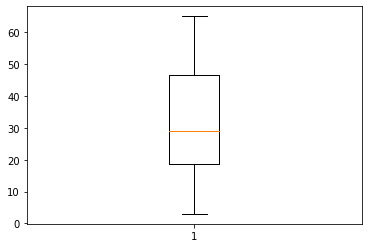

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt

daten = [3, 9, 17, 23, 27, 31, 42, 48, 57, 65]
__=plt.boxplot(daten)

Wir geben die Quantile aus:

In [5]:
import numpy as np
np.quantile(daten, [0.25, 0.5, 0.75])

array([18.5, 29. , 46.5])

Wir wenden dies auf den Datensatz *cars* an und erstellen Boxplot-Diagramme für die Verbräuche (*mpg*) für die Kategorie *cyl* (Anzahl Zylinder).

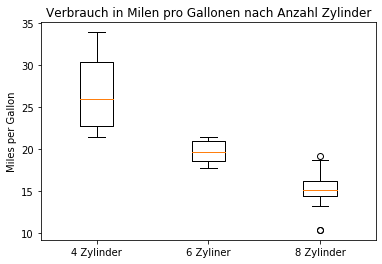

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as m

url = "https://raw.githubusercontent.com/troescherw/datasets/master/cars.csv"
cars = pd.read_csv(url, delimiter=";")

cyl4 = cars.loc[cars.cyl==4]
cyl6 = cars.loc[cars.cyl==6]
cyl8 = cars.loc[cars.cyl==8]

import matplotlib.pyplot as plt
 
value1 = [82,76,24,40,67,62,75,78,71,32,98,89,78,67,72,82,87,66,56,52]
value2=[62,5,91,25,36,32,96,95,3,90,95,32,27,55,100,15,71,11,37,21]
value3=[23,89,12,78,72,89,25,69,68,86,19,49,15,16,16,75,65,31,25,52]
value4=[59,73,70,16,81,61,88,98,10,87,29,72,16,23,72,88,78,99,75,30]
 
box_plot_data=[cyl4.mpg,cyl6.mpg,cyl8.mpg]
plt.boxplot(box_plot_data, labels=["4 Zylinder", "6 Zyliner", "8 Zylinder"])
plt.title("Verbrauch in Milen pro Gallonen nach Anzahl Zylinder")
plt.ylabel("Miles per Gallon")
plt.show()

Übung: Gegeben sei folgende Stichprobe: 7, 12, 8, 16, 19, 10, 12, 22, 19, 17, 35, 1

- Ermitteln Sie den Median
- Ermitteln Sie das untere und obere Quartil
- Ermitteln Sie, ob es Ausreißer gibt
- Kontrollieren Sie die Ergebnisse mit Hilfe von Python (siehe Beispiele oben) und erstellen Sie ein Boxplot-Diagramm